In [60]:
#Beginnings of systematic iterative strategy testing. The backtrader cerebro run is contained within a function with
#strictly defined inputs and outputs. Outcomes of tests are written to a CSV file, which can be analyzed for trends

#TODO: 
#Make and test even larger data sets

#Write a version of BarAvergage analyzer function that only take data over a specific interval and compares it to
#return on SPY or other baseline

#Write a function that plots Number of trades versus percent return for 1 strat, see if it looks like a bell curve

import backtrader as bt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [68]:

from typing import Dict, List
from functools import reduce
from pandas import DataFrame
# --------------------------------
import talib.abstract as tab
from typing import Dict, List
from pandas import DataFrame, DatetimeIndex, merge
# --------------------------------
import talib as ta
import random, time, os
import datetime as dt
import numpy as np
#from dateutil.parser import parse


In [62]:
###BT STRAT CLASSES
class Scalp(bt.Strategy):

    
    
    
#------------------------------------strategy starts here--------------------------------------------------------------    
    def __init__(self):
        #populate exponential moving averages
        self.emahigh=bt.indicators.EMA(self.data.high, period=10)
        self.emaclose=bt.indicators.EMA(self.data.close, period=10)
        self.emalow=bt.indicators.EMA(self.data.low, period=10)
        self.rsi=bt.talib.RSI(self.data.close, timeperiod=14 )
        self.cci=bt.talib.CCI(self.data.high,self.data.low,self.data.close, timeperiod=14 )
        
        #macd indicators
        #self.macd_arr=bt.indicators.macd(self.data.close)
        
        #self.macd=self.macd_arr[0]
        #self.macdsignal=self.macd_arr[1]
        
        
        
        #creat stochastic momentum indicators 
        self.stoch=bt.talib.STOCHF(self.data.high, self.data.low, self.data.close, \
                                   fastk_period=14, slowk_period=4, slowd_period=4)
        self.fastk=self.stoch.fastk
        self.fastd=self.stoch.fastd
        #1 for down, -1 for up
        self.fastcross=bt.indicators.CrossOver(self.fastk, self.fastd)
        
        
        #create Average Directional Movement Index
        self.adx=bt.talib.ADX(self.data.high, self.data.low, self.data.close, timeperiod=14)
        
        
# if open score is less than ema_low, adx is greater than 30, fastk fastd less than 30, then buy
#uses indicators to determine buy and sell

    def next(self):
        if not self.position: #not in the market
            if self.data.open < self.emalow and \
            self.adx > 30 and \
            self.fastd < 30 and \
            self.fastk < 30:
                self.buy()
                
                
        else:
            if self.data.open >= self.emahigh and \
            self.fastd > 70  and \
            self.rsi > 87  and \
            self.fastk > 70:
                self.sell()
                
class Scalp4(bt.Strategy):  
    
#------------------------------------strategy starts here--------------------------------------------------------------    
    def __init__(self):
        #populate exponential moving averages
        self.emahigh=bt.indicators.EMA(self.data.high, period=5)
        self.emaclose=bt.indicators.EMA(self.data.close, period=5)
        self.emalow=bt.indicators.EMA(self.data.low, period=5)
        self.rsi=bt.talib.RSI(self.data.close, timeperiod=14 )
        self.cci=bt.talib.CCI(self.data.high,self.data.low,self.data.close, timeperiod=14 )
        
        #macd indicators
        #self.macd_arr=bt.indicators.macd(self.data.close)
        
        #self.macd=self.macd_arr[0]
        #self.macdsignal=self.macd_arr[1]
        
        
        
        #creat stochastic momentum indicators 
        self.stoch=bt.talib.STOCHF(self.data.high, self.data.low, self.data.close, \
                                   fastk_period=5, slowk_period=3, slowd_period=3)
        self.fastk=self.stoch.fastk
        self.fastd=self.stoch.fastd
        #1 for down, -1 for up
        self.fastcross=bt.indicators.CrossOver(self.fastk, self.fastd)
        
        
        #create Average Directional Movement Index
        self.adx=bt.talib.ADX(self.data.high, self.data.low, self.data.close, timeperiod=14)
        
        
# if open score is less than ema_low, adx is greater than 30, fastk fastd less than 30, then buy
#uses indicators to determine buy and sell

    def next(self):
        if not self.position: #not in the market
            if self.data.open < self.emalow and \
            self.adx > 30 and \
            self.rsi < 29  and \
            self.fastd < 30 and \
            self.fastk > self.fastd and \
            self.fastk < 30:
                self.buy()
                
                
        else:
            if self.data.open >= self.emahigh and \
            self.fastd > 70  and \
            self.rsi > 80  and \
            self.fastk > 70:
                self.sell()

class Scalpy(bt.Strategy):
    """
        this strategy is based around the idea of generating a lot of potential buys and make tiny profits on each trade
        we recommend to have at least 60 parallel trades at any time to cover non avoidable losses.
        Recommended is to only sell based on ROI for this strategy
    """ 
#populate a dataframe with indicators
    
    
    
#------------------------------------strategy starts here--------------------------------------------------------------    
    def __init__(self):
        #populate exponential moving averages
        self.emahigh=bt.indicators.EMA(self.data.high, period=10)
        self.emaclose=bt.indicators.EMA(self.data.close, period=10)
        self.emalow=bt.indicators.EMA(self.data.low, period=10)
        
        self.cci=bt.talib.CCI(self.data.high,self.data.low,self.data.close, timeperiod=14 )
        self.mfi=bt.talib.MFI(self.data.high , self.data.low ,self.data.close ,self.data.volume, timeperiod=14 )
        self.rsi=bt.talib.RSI(self.data.close, timeperiod=14 )
        
        
        
        #macd indicators
        #self.macd_arr=bt.indicators.macd(self.data.close)
        
        #self.macd=self.macd_arr[0]
        #self.macdsignal=self.macd_arr[1]
        
        
        
        #creat stochastic momentum indicators 
        self.stoch=bt.talib.STOCHF(self.data.high, self.data.low, self.data.close, \
                                   fastk_period=14, slowk_period=4, slowd_period=4)
        self.fastk=self.stoch.fastk
        self.fastd=self.stoch.fastd
        #create Average Directional Movement Index
        self.adx=bt.talib.ADX(self.data.high, self.data.low, self.data.close, timeperiod=14)
        
        
# if open score is less than ema_low, adx is greater than 30, fastk fastd less than 30, then buy
#uses indicators to determine buy and sell

    def next(self):
        if not self.position: #not in the market
            if self.data.open < self.emalow and \
            self.adx > 30 and \
            self.fastk < 30 and \
            self.rsi < 25 and \
            self.cci <= -120.0:
                self.buy()
                
                
        else:
            if self.data.open >= self.emahigh and \
            self.fastk > 70 and \
            self.fastd > 70  and \
            self.rsi > 83  and \
            self.cci >= 120.0 :
                self.sell()

class Scalpy3(bt.Strategy):
    
    
    
#------------------------------------strategy starts here--------------------------------------------------------------    
    def __init__(self):
        #populate exponential moving averages
        self.emahigh=bt.indicators.EMA(self.data.high, period=10)
        self.emaclose=bt.indicators.EMA(self.data.close, period=10)
        self.emalow=bt.indicators.EMA(self.data.low, period=10)
        
        self.cci=bt.talib.CCI(self.data.high,self.data.low,self.data.close, timeperiod=14 )
        #macd indicators
        #self.macd_arr=bt.indicators.macd(self.data.close)
        
        #self.macd=self.macd_arr[0]
        #self.macdsignal=self.macd_arr[1]
        
        
        
        #creat stochastic momentum indicators 
        self.stoch=bt.talib.STOCHF(self.data.high, self.data.low, self.data.close, \
                                   fastk_period=14, slowk_period=4, slowd_period=4)
        self.fastk=self.stoch.fastk
        self.fastd=self.stoch.fastd
        #create Average Directional Movement Index
        self.adx=bt.talib.ADX(self.data.high, self.data.low, self.data.close, timeperiod=14)
        
        
# if open score is less than ema_low, adx is greater than 30, fastk fastd less than 30, then buy
#uses indicators to determine buy and sell

    def next(self):
        if not self.position: #not in the market
            if self.data.open < self.emalow and \
            self.adx > 20 and \
            self.fastk < 20 and \
            self.fastd < 20 and \
            self.cci <= -150.0:
                self.buy()
                
                
        else:
            if self.data.open >= self.emahigh and \
            self.fastk > 95 and \
            self.fastd > 95  and \
            self.cci >= 150.0 :
                self.sell()

class Scalpy2(bt.Strategy):
    
    
    
#------------------------------------strategy starts here--------------------------------------------------------------    
    def __init__(self):
        #populate exponential moving averages
        self.emahigh=bt.indicators.EMA(self.data.high, period=10)
        self.emaclose=bt.indicators.EMA(self.data.close, period=10)
        self.emalow=bt.indicators.EMA(self.data.low, period=10)
        
        self.cci=bt.talib.CCI(self.data.high,self.data.low,self.data.close, timeperiod=14 )
        self.mfi=bt.talib.MFI(self.data.high , self.data.low ,self.data.close ,self.data.volume, timeperiod=14 )
        self.rsi=bt.talib.RSI(self.data.close, timeperiod=14 )
        
        
        
        #macd indicators
        #self.macd_arr=bt.indicators.macd(self.data.close)
        
        #self.macd=self.macd_arr[0]
        #self.macdsignal=self.macd_arr[1]
        
        
        
        #creat stochastic momentum indicators 
        self.stoch=bt.talib.STOCHF(self.data.high, self.data.low, self.data.close, \
                                   fastk_period=14, slowk_period=4, slowd_period=4)
        self.fastk=self.stoch.fastk
        self.fastd=self.stoch.fastd
        #create Average Directional Movement Index
        self.adx=bt.talib.ADX(self.data.high, self.data.low, self.data.close, timeperiod=14)
        
        
# if open score is less than ema_low, adx is greater than 30, fastk fastd less than 30, then buy
#uses indicators to determine buy and sell

    def next(self):
        if not self.position: #not in the market
            if self.data.open < self.emalow and \
            self.adx > 30 and \
            self.fastk < 30 and \
            self.fastd < 30 and \
            self.cci <= -130.0:
                self.buy()
                
                
        else:
            if self.data.open >= self.emahigh and \
            self.fastk > 75 and \
            self.fastd > 75  and \
            self.rsi > 85  and \
            self.cci >= 100.0 :
                self.sell()

class Scalp2(bt.Strategy):
    
    
    
#------------------------------------strategy starts here--------------------------------------------------------------    
    def __init__(self):
        #populate exponential moving averages
        self.emahigh=bt.indicators.EMA(self.data.high, period=10)
        self.emaclose=bt.indicators.EMA(self.data.close, period=10)
        self.emalow=bt.indicators.EMA(self.data.low, period=10)
        self.rsi=bt.talib.RSI(self.data.close, timeperiod=14 )
        self.cci=bt.talib.CCI(self.data.high,self.data.low,self.data.close, timeperiod=14 )
        
        #macd indicators
        #self.macd_arr=bt.indicators.macd(self.data.close)
        
        #self.macd=self.macd_arr[0]
        #self.macdsignal=self.macd_arr[1]
        
        
        
        #creat stochastic momentum indicators 
        self.stoch=bt.talib.STOCHF(self.data.high, self.data.low, self.data.close, \
                                   fastk_period=14, slowk_period=4, slowd_period=4)
        self.fastk=self.stoch.fastk
        self.fastd=self.stoch.fastd
        #1 for down, -1 for up
        self.fastcross=bt.indicators.CrossOver(self.fastk, self.fastd)
        
        
        #create Average Directional Movement Index
        self.adx=bt.talib.ADX(self.data.high, self.data.low, self.data.close, timeperiod=14)
        
        
# if open score is less than ema_low, adx is greater than 30, fastk fastd less than 30, then buy
#uses indicators to determine buy and sell

    def next(self):
        if not self.position: #not in the market
            if self.data.open < self.emalow and \
            self.adx > 30 and \
            self.fastd < 30 and \
            self.fastk < 30:
                self.buy()
                
                
        else:
            if self.data.open >= self.emahigh and \
            self.fastd > 70  and \
            self.rsi > 90  and \
            self.fastk > 70:
                self.sell()

In [63]:
###FUNCTIONS

StratList = ['Scalp','Scalp4','Scalpy','Scalpy3','Scalpy2','Scalp2']
#this variable must be present!

def writeInputOutput(Strategy,Input,Output,CSVfilename):
#The column order in the CSV is currently: 
#Timestamp; Strategy; Symbol; StartDate; EndDate; Interval; BarLength; Set; PercentIncrease; Ntrades
#Strategy is the strategy name string, input/output are dicts, CSVfilename= BTArchive1.csv
#Assumes a such a file already exists, copypaste the above line into a txt, call it XXXX.csv

    if not CSVfilename in os.listdir(): #don't write a new file. 
        print(CSVfilename+' not found.')
        return
    with open(CSVfilename,'a') as CSV: #append mode
        Timestamp = str(int(time.time())) #"ID number"
        time.sleep(1)
        PercentIncreaseStr = '{:.2f}'.format(Output['PercentIncrease'])
        
        CSV.write(Timestamp+','+Strategy+','+Input['SYM']+','+Input['StartDate']+','+Input['EndDate']+','+
                 Input['Interval']+','+str(Input['YDF'].shape[0])+','+
                 Input['Set']+','+PercentIncreaseStr+','+str(Output['Ntrades'])+"\n")
        CSV.close()
        
def getInputs_SYMS(N,SymListTxt,StartDate,EndDate,Interval):
    #Get many inputs of random symbols
    #N=number of symbols to pull, SymListText = "data set" to pull them from (must end with SYM.txt, 
        #i.e. BigCapSYM.txt) 
    #Interval = bar interval (same as yf, '1m', 30m, 1d, 1mo, et),
    #Dates as a string ('2020-04-06')
    
    
    SYMS = [False]*N
    Inputs = []
    for i in range(N):
        while True: #Keep going until you get a valid YDF
            #choose a symbol, no repeats
            f = open(SymListTxt)
            flines=f.readlines()
            while True:
                SYM = random.choice(flines).rstrip("\n")
                if not SYM in SYMS:
                    break
            f.close()
            #download
            YDF = yf.download([SYM],start=StartDate,end=EndDate,interval=Interval)
            if not YDF.shape[0]==0: #No data was downloaded, yf will describe what went wrong
                SYMS[i]=SYM
                break
        
        YDF = YDF.dropna() #Remove NaN rows, if any
        Inputs.append({'YDF':YDF,'SYM':SYM,'StartDate':StartDate,
                       'EndDate':EndDate,'Interval':Interval,
                      'Set':SymListTxt.rstrip("SYM.txt")})
        #dt.datetime.strptime(StartDate,'%Y-%m-%d')
    return Inputs #returns list of dicts, dicts containing the YDF and its important qualifiers

def getInput(SYM,StartDate,EndDate,Interval,Set='All'):
    #simpler version of getInputs for one symbol.
    #reguires set text string for category, use ALL for now
    
    
    YDF = yf.download([SYM],start=StartDate,end=EndDate,interval=Interval)
    if YDF.shape[0]==0: #No data was downloaded, yf will describe what went wrong
        return False
    YDF = YDF.dropna() #Remove NaN rows, if any
        
    Input = {'YDF':YDF,'SYM':SYM,'StartDate':StartDate,
                   'EndDate':EndDate,'Interval':Interval,
                  'Set':Set}
    #dt.datetime.strptime(StartDate,'%Y-%m-%d')
    return Input #returns list of dicts, dicts containing the YDF and its important qualifiers

def getInputs_DATES(N,SYM,StartRange,EndRange,DaySpan,Interval,Set='All'):
    #N = number of random dates to get
    #DateSpan = integer indicating how many days each input set should span
    #StartRange, Endrange = sample period, formatted with %Y-%m-%d
    StartDates = [False]*N
    EndDates = [False]*N
    Inputs = []
    for i in range(N):
        while True: #Keep going until you get a valid YDF
            #choose a date, no repeats
            sord = dt.datetime.strptime(StartRange,'%Y-%m-%d').date().toordinal()
            eord = dt.datetime.strptime(EndRange,'%Y-%m-%d').date().toordinal()
            tord = dt.datetime.now().date().toordinal()
            while True:
                StartDateD = dt.date.fromordinal(random.randint(sord, eord)) #date object
                EndDateD = StartDateD + dt.timedelta(days=DaySpan)
                if not StartDateD.strftime('%Y-%m-%d') in StartDates \
                and tord-EndDateD.toordinal() >= 0: 
                #Dates lists contain strs. Also, no end dates in the future
                    break
            
            
            #download
            StartDate = StartDateD.strftime('%Y-%m-%d')
            EndDate = EndDateD.strftime('%Y-%m-%d')
            #print(StartDate+'__'+EndDate)
            YDF = yf.download([SYM],start=StartDate,end=EndDate,interval=Interval)
            
            if not YDF.shape[0]==0: #No data was downloaded, yf will describe what went wrong
                StartDates[i] = StartDate
                EndDates[i] = EndDate
                break
            
        YDF = YDF.dropna() #Remove NaN rows, if any        
        Inputs.append({'YDF':YDF,'SYM':SYM,'StartDate':StartDate,
                       'EndDate':EndDate,'Interval':Interval,
                      'Set':Set})
        #dt.datetime.strptime(StartDate,'%Y-%m-%d') .strftime('%Y-%m-%d')
    return Inputs #returns list of dicts, dicts containing the YDF and its important qualifiers

def getInputs_DATESYMS(N,SymListTxt,StartRange,EndRange,DaySpan,Interval,Set='All'):
    #ok cool, now let's randomize dates and SYMS at the same time
    StartDates = [False]*N
    EndDates = [False]*N
    SYMS = [False]*N
    Inputs = []
    for i in range(N):
        while True:
            #choose a date, no repeats
            sord = dt.datetime.strptime(StartRange,'%Y-%m-%d').date().toordinal()
            eord = dt.datetime.strptime(EndRange,'%Y-%m-%d').date().toordinal()
            tord = dt.datetime.now().date().toordinal()
            while True:
                StartDateD = dt.date.fromordinal(random.randint(sord, eord)) #date object
                EndDateD = StartDateD + dt.timedelta(days=DaySpan)
                if not StartDateD.strftime('%Y-%m-%d') in StartDates \
                and tord-EndDateD.toordinal() >= 0: 
                #Dates lists contain strs. Also, no end dates in the future
                    break    
            #choose a symbol, no repeats
            f = open(SymListTxt)
            flines=f.readlines()
            while True:
                SYM = random.choice(flines).rstrip("\n")
                if not SYM in SYMS:
                    break
            f.close()
            
            #download
            StartDate = StartDateD.strftime('%Y-%m-%d')
            EndDate = EndDateD.strftime('%Y-%m-%d')
            YDF = yf.download([SYM],start=StartDate,end=EndDate,interval=Interval)
            
            if not YDF.shape[0]==0: #No data was downloaded, yf will describe what went wrong
                StartDates[i] = StartDate
                EndDates[i] = EndDate
                SYMS[i] = SYM
                break
                
        YDF = YDF.dropna() #Remove NaN rows, if any    
        Inputs.append({'YDF':YDF,'SYM':SYM,'StartDate':StartDate,
                       'EndDate':EndDate,'Interval':Interval,
                      'Set':Set})
    return Inputs #returns list of dicts, dicts containing the YDF and its important qualifiers
            
        
    

def testInput(Input,StratName,WriteFile='BTArchive1.csv'):
    #feed dataframe to cerbro
    datacere = bt.feeds.PandasData(dataname=Input['YDF'])
    
    #create backtrader
    cerebro = bt.Cerebro()
    #Find strategy. I could do this with eval(StartName), but that's not safe
    if StratName in StratList:
        cerebro.addstrategy(eval(StratName)) #this eval isn't too much of a security risk, is it?
    else:
        print('StratName not Found')
        return

    #set up cerebro
    StartCash = 100000 #I would like this number for later
    cerebro.broker.setcash(StartCash)
    cerebro.broker.setcommission(commission=0.0)
    cerebro.addsizer(bt.sizers.AllInSizer)
    #All In Sizer always uses maximum cash possible, meaning we can divide the profit by the starting cash later to
    #get a normalized percent increase
    cerebro.adddata(datacere)
    #Analyzers. I am not sure how many of these lines are necessary
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
    cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")
    cerebro.addanalyzer(bt.analyzers.Returns, _name="ret")
    cerebro.addanalyzer(bt.analyzers.PeriodStats, _name="pstat")
    cerebro.addanalyzer(bt.analyzers.Transactions, _name="trans")
    
    #Run
    try:
        result = cerebro.run()
        analysis = result[0].analyzers.ta.get_analysis()
    except IndexError:
        print('Error in Cerebro')
        return False
    #Get the output
    Gross = cerebro.broker.getvalue()
    PercentIncrease= (Gross-StartCash)/StartCash*100
    Ntrades = analysis['total']['total']
    Output = {'PercentIncrease':PercentIncrease,'Ntrades':Ntrades}
    
    if bool(WriteFile):
        writeInputOutput(StratName,Input,Output,WriteFile)
    print('Used {} on {} from {} to {}'.format(StratName,Input['SYM'],Input['StartDate'],Input['EndDate']))                                                       
    print('Returned {:.2f}% with {:d} trades'.format(Output['PercentIncrease'],Output['Ntrades']))
    print('<==========*==========>')
    return Output
    


    
            
            

In [64]:
#Do Stuff
SYMtxt = "IBD50_2020-04-13SYM.txt"
Today = dt.date.today().strftime('%Y-%m-%d')
Yester = (dt.date.today()-dt.timedelta(days=7)).strftime('%Y-%m-%d')

#I = getInput('GOOG',Yester,Today,'1m')

for Strat in StratList:
    Inputs = getInputs_SYMS(5,SYMtxt,Yester,Today,'1m')
    for I in Inputs:
        testInput(I,Strat) 

#Input0 = getInput('GOOG','2013-03-13','2014-03-13','1d')
#Inputs1 = getInputs_DATES(5,'MSFT','2012-04-04','2020-04-04',200,'1d')
#Inputs2 = getInputs_SYMS(5,'AllSYM.txt','2020-04-03','2020-04-04','1m')
#Inputs3 = getInputs_DATESYMS(5,'AllSYM.txt','2012-04-04','2020-04-04',500,'5d')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Used Scalp on ARE from 2020-04-07 to 2020-04-14
Returned 2.67% with 1 trades
<==========*==========>
Used Scalp on MSFT from 2020-04-07 to 2020-04-14
Returned 0.29% with 1 trades
<==========*==========>
Used Scalp on BMY from 2020-04-07 to 2020-04-14
Returned 2.31% with 1 trades
<==========*==========>
Used Scalp on AUDC from 2020-04-07 to 2020-04-14
Returned -4.01% with 1 trades
<==========*==========>
Used Scalp on BX from 2020-04-07 to 2020-04-14
Returned -1.08% with 3 trades
<==========*==========>
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[********

In [76]:
###ANALYSIS FUNCTIONS

def BarAverage1(Strats,Interval,Yaxis='PercentIncrease',Weighting='DataSize',CSV='BTArchive1.csv'):
    #Runs through lines in the CSV archive, averaging together all lines of the same strat name tested 
    #over the specified interval. The average can be weighted by the total length of the input data used or the 
    #number of trades made
    
    #get the Y data
    DF = pd.read_csv(CSV)
    RealData = DF.loc[((DF['Interval']==Interval) & (DF['Ntrades'] > 0))]
    SMeans = np.zeros(len(Strats))
    for i in range(len(Strats)):
        StratData = RealData.loc[(RealData['Strategy']==Strats[i])]
        if Yaxis == 'PercentIncrease':
            if Weighting == 'DataSize':
                SMeans[i] = sum(StratData.loc[:,'PercentIncrease']*StratData.loc[:,'BarLength'])/\
                sum(StratData.loc[:,'BarLength'])
            elif Weighting == 'Ntrades':
                SMeans[i] = sum(StratData.loc[:,'PercentIncrease']*StratData.loc[:,'Ntrades'])/\
                sum(StratData.loc[:,'Ntrades'])
    #Get bar positions and labels
    barwidth = 0.25
    barx = np.arange(len(Strats))
    plt.xticks([r + barwidth*0.5 for r in range(len(Strats))],Strats)
    #Plot
    plt.bar(barx,SMeans,width=barwidth,color='blue')
    plt.axhline(color='Black')
    plt.xlabel('Strategy')
    plt.ylabel('Mean Percent Return',size=16)
    plt.title('Interval = {}, Weighting = {}'.format(Interval,Weighting))
    plt.show()

    
    
    

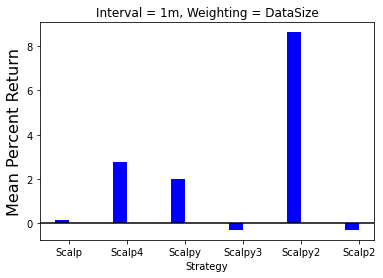

In [77]:
###ANALYZE STUFF
BarAverage1(StratList,'1m')

In [46]:
a = pd.read_csv("BTArchive1.csv")

In [58]:
sum(a.loc[:,'PercentIncrease']*a.loc[:,'Ntrades'])/a.shape[0]

3.3969999999999994

In [49]:
a.shape

(30, 9)

In [59]:
13/\
13

1.0